# Lista 9 (9 pkt.)

In [1]:
import numpy as np
import hashlib
import matplotlib.pyplot as plt

## Zadanie 1 (1 pkt.)

Wczytaj dwa obrazki: 'Campin_Boze_Narodzenie1.png' oraz 'Campin_Boze_Narodzenie2.png' jeden z nich jest zgodny z oryginałem obrazu Roberta Campin a drugi jest lekko zmodyfikowany, rozponaj prawdziwy obraz obliczając jego funkcję skrótu SHA-256 i porównując ją do skrótu podanego poniżej (w postaci szesnastkowej), który odpowiada oryginałowi:

In [2]:
hash_original='2d08246bbb3a8f6b0c16b8d8effd2c783233a6a174496731dfff887bb41bc7e7'

Obrazek wczytaj za pomocą:

In [3]:
file = open('Campin_Boze_Narodzenie1.png','rb')
obraz1=file.read()
file.close()

In [4]:
file = open('Campin_Boze_Narodzenie2.png','rb')
obraz2=file.read()
file.close()

'rb' w powyższej funkcji oznacza, że odczytujemy binarną postać obrazu. Podobnie wczytaj drugi obraz. Do policzenia funkcji skrótu użyj biblioteki hashlib: https://docs.python.org/3/library/hashlib.html

In [5]:
hashlib.sha256(obraz1).hexdigest() == hash_original

True

In [6]:
hashlib.sha256(obraz2).hexdigest() == hash_original

False

## Zadanie 2 (2 pkt.)

Zaimplementuj funkcję $rho\_pollard()$ znajdującą kolizje w funkcji skrótu za pomocą agorytmu rho Pollarda. Wypisz przykładowe pary argumentów, które mają taki sam skrót dla funkcji $simple\_hash()$, która przyjmuje liczbę zapisaną szesnastkowo w postaci stringu i zwraca hash w postaci stringu z zapisem szesnastkowym.

In [7]:
from random import randint

In [8]:
def rho_pollard():
    N = 10
    print("  i    Hi   Hi+1    Hi'  Hi+1'")
    
    for _ in range(N):
        
        H0 = f"{randint(0, 255):02x}"

        H = simple_hash(H0)
        H_prime = simple_hash(simple_hash(H0))
        
        j = 1
        old_H = [H, H]
        old_H_prime = [H_prime, H_prime]
        
        while H != H_prime:
            H = simple_hash(H)
            H_prime = simple_hash(simple_hash(H_prime))
            j += 1
            old_H = [old_H[1], H]
            old_H_prime = [old_H_prime[1], H_prime]
    
        print(f"{j:3}  {old_H} {old_H_prime}")

In [9]:
def simple_hash(str):
    m = hashlib.sha256()
    m.update(bytes(int(str,16)))
    return m.hexdigest()[:2]

In [10]:
rho_pollard()

  i    Hi   Hi+1    Hi'  Hi+1'
 13  ['96', '1d'] ['02', '1d']
 13  ['0a', '01'] ['11', '01']
 13  ['0a', '01'] ['11', '01']
 39  ['7c', '7b'] ['fd', '7b']
 13  ['f2', 'fd'] ['6e', 'fd']
 26  ['7c', '7b'] ['fd', '7b']
 26  ['37', '02'] ['40', '02']
 26  ['1d', '11'] ['96', '11']
 13  ['11', '0a'] ['1d', '0a']
 13  ['17', '01'] ['11', '01']


In [11]:
simple_hash(simple_hash('fd')) == simple_hash('7c')

True

## Zadanie 3 (2 pkt.)

Napisz funkcję $HMAC(K,M)$, która przyjmuje klucz oraz wiadomość a zwraca kod HMAC, wszystko w postaci stringu bitów. Funkcja $hash()$ to funkcja SHA256 ale przyjmująca i zwracająca dane w postaci stringu bitów. Przyjmij długość bloku 64 bity (przypadek DESa).

In [12]:
def bin2dec(bin_str):
    return int(bin_str, 2)

def dec2bin(dec_str,pad):
    return f"{dec_str:b}".rjust(pad, '0')

In [13]:
def HMAC(K,M):
    L = 64
    def xor(a, b):
        return dec2bin(bin2dec(a) ^ bin2dec(b), len(a))
    
    padded_K = K.rjust(L, '0')
    opad = f'{0x5c:0>8b}' * (L//8)
    ipad = f'{0x36:0>8b}' * (L//8)
    
    o_key_pad = xor(padded_K, opad)
    i_key_pad = xor(padded_K, ipad)
    
    return hash(o_key_pad + hash(i_key_pad + M))
    

In [14]:
def hash(i):
    m = hashlib.sha256()
    m.update(int(i,2).to_bytes(len(i),'little'))
    return format(int(m.hexdigest(),16),'0256b')

In [15]:
# def hash(i):
#     m = hashlib.sha256()
#     m.update(i.to_bytes())
#     return int(m.hexdigest(),16)

In [16]:
print(HMAC('0010111000111100100000001100001000110000100011001110011110010000','0100011001010010011011010100100100011101011101111011010000101010')
    == '1101011010010010001001010001100000001011000100001100101110111010000001000000110000001111011111110101011101111010110111001111001001001010000011110101110101010000100011110100101000111001000111000011111000011111001001110000110001111100110011110010100110000100')
print(HMAC('1000110000100011001111011101000000010001110101110011101011000110','1100110101011010110010110011001001010000000000111000011011000011')
    == '0100010101000110011101000100111010101111011110001010001001011000010001011100010100000000010010110000100010010101011011000010111000001110000101100011101100111111001000101101110011101100001111000000011111011111100001010111010011010010101100010101011100111010')
print(HMAC('0010100101111010101111100000101110110001011111100101000010001010','1110001110111101101100001010001110011101011111101010110011000000')
    == '1101010101011101110011000000111100111100100100011001011000001011101001100011011011010100110100010110101100000011010100000100111100111111100001110100000100100111100011111011000110101010000101110001110111101110011001000010001001001010010011000000111000011111')

True
True
True


Zmienne $msg\_enc1$ oraz $msg\_enc2$ zawierają dwie wiadomości. Jedna z nich jest poprawna druga ma zmieniony jeden bit. Wiemy, że wiadomośc zaszyfrowano za pomocą DESa z kluczem $key$ i nadawca dodał do niej kod HMAC zawarty w zmiennej $hmac$. Sprawdź, która z otrzymanych wiadomości jest poprawna.

In [17]:
msg_enc1 = '0110011010100110101010011000011111010000110111011011110110110101'
msg_enc2 = '0110011010100110101010011000011111010000110111010011110110110101'
key = '0001101100001110010010101101001101101010000100100000100001101100'

In [18]:
hmac = '1010011101011000110010101011100100001001110111010000110100110111001001110010001101001010000011010001001101010100000010100111110010101011001101001010101100110110000101101110100000010001101011011011110011110111011100110000011010110001110000011000011100101001'

In [19]:
HMAC(key, msg_enc1) == hmac

True

In [20]:
HMAC(key, msg_enc2) == hmac

False

## Zadanie 4 (2 pkt.)

Napisz funkcję $sign(file\_name, e, n)$ generującą podpis elektroniczny pliku, gdzie $file\_name$ to nazwa pliku, $e$ i $n$ to klucz prywatny algorymtu RSA, oznaczenia jak na liście 7., funkcja ma zwracać podpis w postaci stringu z zapisem szesnastkowym.

In [21]:
def pow_mod(x,n,m):
    p = 1
    bits = f"{n:b}"
    for b in bits:
        p = (p**2) % m
        if b == '1':
            p = (p*x) % m
            
    return p

def enc(x,e,n):
    x = int(x, 16)
    y = pow_mod(x, e, n)
    return f'{y:0x}'
    
def dec(y,d,n):
    y = int(y, 16)
    x = pow_mod(y, d, n)
    return f'{x:0x}'

def inv(p,n):
    t, nt = 0, 1
    r, nr = n, p
    
    while nr != 0:
        q = r // nr
        t, nt = nt, t - q * nt
        r, nr = nr, r - q * nr
        
    if t < 0:
        t = t + n
        
    return t

def key_gen(p,q):
    n = p * q
    fi = (q - 1) * (p - 1)
    e = 2 ** (2 ** 4) + 1
    d = inv(e, fi)
    return (n, e, d)

In [22]:
def sign(file_name, e, n):
    file = open(file_name,'rb')
    data = file.read()
    file.close()
    
    hash = hashlib.sha256(data).hexdigest()
    
    return enc(hash, e, n)

Napisz funkcję $check\_sign(file\_name, d, n, sign)$ weryfikującą autentyczność podpisu, gdzie $file\_name$ to nazwa pliku $d$ i $n$ to klucz publiczny autora podpisu a $sign$ to podpis, funkcja ma zwracać $True$ lub $False$.

In [23]:
def check_sign(file_name, d, n, sign):
    file = open(file_name, 'rb')
    data = file.read()
    data_hex = data.hex()
    file.close()
    
    hash_from_data = hashlib.sha256(data).hexdigest()
    decrypted_key = dec(sign, d, n)
     
    return hash_from_data == decrypted_key

Wygeneruj klucze RSA z liczb pierwszych $p$ i $q$ i użyj ich w testach.

In [24]:
p=24130780476900131841553779066939443255102203937160657723394451174808141403858935238883126295228560935516885174421847238379397184900972008801015315248328437
q=26660613491521684005574100352062919789979599401844483402246984186988668019447679726081352452799126206997555710356464145743285983450292024894053538317854159

In [25]:
n, e, d = key_gen(p, q)

In [26]:
print(sign('correlation.png',e,n)=='1d5e7cd47f75b13159a37c8ffb3ba7d9f43a21f4758ae06e856da0a468fd1772f7b8b52d0f948fd02610e0e05a54c0fff12d7bd27575583cfdf53b124e9c0e95df1de156aa0af52239f1329ab69000b4a6a61d3d45f190c4b9df4ca4b7d30904162727353a8fb09c9faf847eeb0f6f65394d92cb57ced2cdcff36c444394e3fff')
print(sign('Campin_Boze_Narodzenie1.png',e,n)=='1c6097177871bb4873fcd0ae658d28f46fcc54e4b0e595954a57c0008f8b86c7427cecf28296240025941fe2a019b80fcc5f43c4cae6b1d2163cecf8438336d3da6e33ae326dfa2c0e5ea7bbad511dd140bc7b0cd34829623bfd02bc66bc9b43d57443b7fd950bea5cb5f5df99d8611eeb0d4458b19809e3ff86abf6538c3e453')

True
True


In [27]:
print(check_sign('correlation.png',d,n,'1d5e7cd47f75b13159a37c8ffb3ba7d9f43a21f4758ae06e856da0a468fd1772f7b8b52d0f948fd02610e0e05a54c0fff12d7bd27575583cfdf53b124e9c0e95df1de156aa0af52239f1329ab69000b4a6a61d3d45f190c4b9df4ca4b7d30904162727353a8fb09c9faf847eeb0f6f65394d92cb57ced2cdcff36c444394e3fff')==True)
print(check_sign('correlation.png',d,n,'1d5e7cd47f75b13159a37c8ffb3ba7d9f43a21f4758ae06e856ba0a468fd1772f7b8b52d0f948fd02610e0e05a54c0fff12d7bd27575583cfdf53b124e9c0e95df1de156aa0af52239f1329ab69000b4a6a61d3d45f190c4b9df4ca4b7d30904162727353a8fb09c9faf847eeb0f6f65394d92cb57ced2cdcff36c444394e3fff')==False)
print(check_sign('Campin_Boze_Narodzenie1.png',d,n,'1c6097177871bb4873fcd0ae658d28f46fcc54e4b0e595954a57c0008f8b86c7427cecf28296240025941fe2a019b80fcc5f43c4cae6b1d2163cecf8438336d3da6e33ae326dfa2c0e5ea7bbad511dd140bc7b0cd34829623bfd02bc66bc9b43d57443b7fd950bea5cb5f5df99d8611eeb0d4458b19809e3ff86abf6538c3e453')==True)
print(check_sign('Campin_Boze_Narodzenie1.png',d,n,'1c6097177871bb4873fcd0ae658d28f46fec54e4b0e595954a57c0008f8b86c7427cecf28296240025941fe2a019b80fcc5f43c4cae6b1d2163cecf8438336d3da6e33ae326dfa2c0e5ea7bbad511dd140bc7b0cd34829623bfd02bc66bc9b43d57443b7fd950bea5cb5f5df99d8611eeb0d4458b19809e3ff86abf6538c3e453')==False)

True
True
True
True


## Zadanie 5 (2 pkt.)

"Kopanie" Bitcoina polega w uproszczeniu na szukaniu liczby dla której funkcja skrótu zwraca wartość mniejszą niż pewien próg, tzn. wartośc funkcji skrótu musi zaczynać się odpowiednią liczbą zer w zapisie bitowym. Jako, że funkcja skrótu ma właściwości pseudolosowe, szukamy tej liczby sprawdzając po kolei wszystkie liczby. Napisz funkcję $mine(d)$, szukającą takiej liczby $i$ dla której $SHA256(i)$ zaczyna się w zapisie bitowym $d$ zerami. Podstawiaj kolejno liczby $0,1,2,3,...$. Funkcja ma zwracać liczbę dla której udało się spełnić warunek.

Uwaga: aby podać zmienną typu $int$ jako argument do hashlib.sha256() należy przekonwerstować ją za pomocą $bytes()$

In [28]:
from random import randint

def mine(diff, rand=False, rand_limit=10**7):
    
    i = 0
    x = 0
    starting_bits = '0' * diff
    
    if rand:
        x = randint(0, rand_limit)
    
    def hex2bin(h):
        return f"{int(h, 16):0b}".rjust(len(h)*4, '0')

    def next_b():
        hash = hashlib.sha256(x.to_bytes(32, 'big')).hexdigest()
        return hex2bin(hash)
    
    b = next_b()
    while not b.startswith(starting_bits):
        
        if rand:
            x = randint(0, rand_limit)
        else:
            x += 1
        i += 1    
        b = next_b()
        
        if i > 10**12:
            raise ArithmeticError('Too big to calculate')
        
    return(i)

Wykonaj funkcję $mine(d)$ dla kilkunastu wartości $d$ i narysuj wykres $plt.scatter()$ zależności $i(d)$.

Uwaga: użyj skali logarytmicznej $plt.yscale('symlog')$.

Zastanów się ile teoretycznie (średnio) należy wykonać prób aby znaleźć funkcję skrótu z $d$ zerami na początku. Narysuj na wykresie linię obrazującą tą zależność i porównaj z punktami uzyskanymi z funkcji $mine()$.

Powtórz pomiary, ale zamiast brać kolejne liczby, bierz losowe. Sprawdź czy daje to lepsze rezultaty.

In [29]:
def scatter(data):
    ax = plt.figure(figsize=(10,8)).gca()
    ax.yaxis.get_major_locator().set_params(integer=True)
    ax.xaxis.get_major_locator().set_params(integer=True)
    plt.yscale('symlog')
    for i in range(0, len(data)):
        x, y = data[i]
        plt.scatter(x, y, facecolors='none', edgecolors='b')
        plt.text(x + .05, y + .05, f"{i+1}")

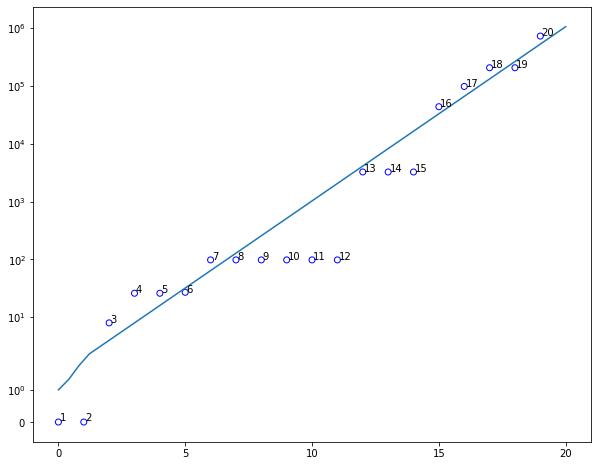

In [30]:
data = []
i = 0

for d in range(20):
    i = mine(d)
    data.append([d, i])
    
scatter(data)
x = np.linspace(0,20);
plt.plot(x, 2**x)

Skoro ciąg bitów jest pseudolosowy, to na każdym kolejnym polu będzie jedna z dwóch wartości: '0' lub '1'. 

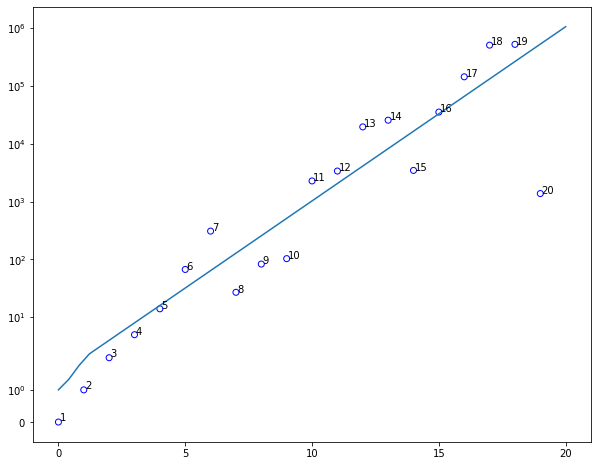

In [31]:
data = []
i = 0

for d in range(20):
    i = mine(d, rand=True)
    data.append([d, i])
    
scatter(data)
plt.plot(x, 2**x)